# Word Clouds - The Dark Tower Series

Let's take a look at the most common words used in the epic series **The Dark Tower**, by Stephen King.

# 1. Word Clouds

From <a href="https://en.wikipedia.org/wiki/Tag_cloud">Wikipedia</a>:<br>
*A tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.*

What does that mean? A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

# 2. The Dark Tower

Again, from <a href="https://en.wikipedia.org/wiki/The_Dark_Tower_(series)">Wikipedia</a>:<br>
*The Dark Tower is a series of eight books and one short story written by American author Stephen King. Incorporating themes from multiple genres, including dark fantasy, science fantasy, horror, and Western, it describes a "gunslinger" and his quest toward a tower, the nature of which is both physical and metaphorical. The series, and its use of the Dark Tower, expands upon Stephen King's multiverse and in doing so, links together many of his other novels.*

We have a collection of nine stories telling an epic tale of the gunslinger and his group of friends, his *ka-tet*, going to the Dark Tower, with more than four thousand pages. Besides that, we will also take a look at the poem that inspired Stephen King to write this series, "*Childe Roland to the Dark Tower Came*" by Robert Browning.

| Order | Title | Pages | Words | Release Year|
| --- | --- | --- | --- | --- | 
| 0 | Childe Roland to the Dark Tower Came | 6 | 1,761 | 1855 |
| 0.5 | The Little Sisters of Eluria | 66 | 23,434 | 1998 |
| 1 | The Gunslinger | 224 | 55,376 | 1982 |
| 2 | The Drawing of the Three | 400 | 125,948 | 1987 |
| 3 | The Waste Lands | 512 | 173,489 | 1991 |
| 4 | Wizard and Glass | 787 | 254,691 | 1997 |
| 4.5 | The Wind Through the Keyhole | 336 | 91,857 | 2012 |
| 5 | Wolves of the Calla | 714 | 242,776 | 2003 |
| 6 | Song of Susannah | 432 | 118,221 | 2004 | 
| 7 | The Dark Tower | 845 | 272,273 | 2004 |
| | **Total for The Dark Tower series** | 4,316 | 1,358,065 | |


It took 22 years to reach its conclusion, but Stephen King says this is just a part of a bigger story. 

# 3. Data set

We want to visualize the frequency of the most common words in this series of books. We will generate a graph for each book and another for whe whole body of text. Our input data is composed of ten text files, one for each title.

We won't be doing any exploration analysis, but we have some guesses of what we expect as the most relevant words. For the poem, we don't have any prior knowledge. The first book is mainly a solo story, with the gunslinger follows the man in black and meets the boy Jake. For the other books, *gunslinger* and *Roland* are the main ways the main character is referred to. His companions are *Jake*, *Eddie*, *Susannah* and their pet *Oy*. This group is moving towards the *Dark Tower*. The short story and some of the books are recollections of memmories from Roland, so other names will pop up.

# 4. Generating Word Clouds

The process to create the visualizations is very straightforward. We will describe the step-by-step for the first text and then streamline the process for the others. Let's import the libraries and tackle one book at a time.

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
from PIL import Image

## 4.1 *Childe Roland to the Dark Tower Came*

Luckily, our first effort will be with the smallest file. It will be a nice introduction to the technique. Let's load the file and check its first lines. You can read it <a href="https://www.sparknotes.com/poetry/browning/section8/">here</a>.

In [3]:
bookfile0 = open("childe_roland.txt","r+") 
book0 = bookfile0.readlines()
bookfile0.close()
book0[:5]

['I.\n',
 'My first thought was, he lied in every word,\n',
 'That hoary cripple, with malicious eye\n',
 'Askance to watch the workings of his lie\n',
 'On mine, and mouth scarce able to afford\n']

We can see the text, but have to get rid of everything else. Let's to do some data cleaning. First, *\n* is the code to add a new line, and it shouldn't be in our analysis.

In [4]:
book0_clean = []
for line in book0:
    book0_clean.append(re.sub('\n', '', line))
book0_clean[:5]

['I.',
 'My first thought was, he lied in every word,',
 'That hoary cripple, with malicious eye',
 'Askance to watch the workings of his lie',
 'On mine, and mouth scarce able to afford']

Now, we will remove everything that isn't alphanumeric, as it won't show up in our visualization.

In [5]:
book0_cleaner = []
for line in book0_clean:
    book0_cleaner.append(re.sub(r'[^\w\s]', '', line))
book0_cleaner[:5]

['I',
 'My first thought was he lied in every word',
 'That hoary cripple with malicious eye',
 'Askance to watch the workings of his lie',
 'On mine and mouth scarce able to afford']

For our final step, we will join all the lines in a single string, in lowercase. This is important so we don't count a word as a different entity just because there is a sentence starting with it.

In [6]:
string_book0 = " ".join([text.lower() for text in book0_cleaner])
print('First 100 characters: ', string_book0[:100])
print('Length of string: ',len(string_book0))

First 100 characters:  i my first thought was he lied in every word that hoary cripple with malicious eye askance to watch 
Length of string:  8887


We are ready to generate our first word cloud!

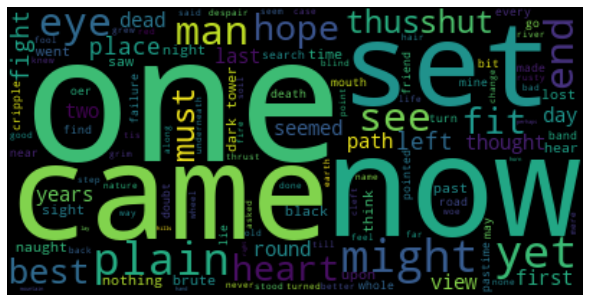

In [7]:
cloud0 = WordCloud().generate(string_book0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud0, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

The main words are *one*, *now*, *came*, and *set*. Nothing much can be learned from this, but we can make it better looking.

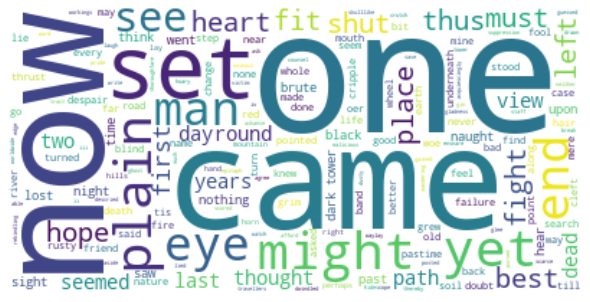

In [8]:
cloud0 = WordCloud(background_color="white").generate(string_book0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud0, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Much nicer to the eyes! <br> Now the process is well established and we will apply it to the other books.

## 4.2 *The Little Sisters of Eluria*

First 100 characters:  i full earth the empty town the bells the dead boy  the overturned wagon the green folk  on a day in
Length of string:  123048


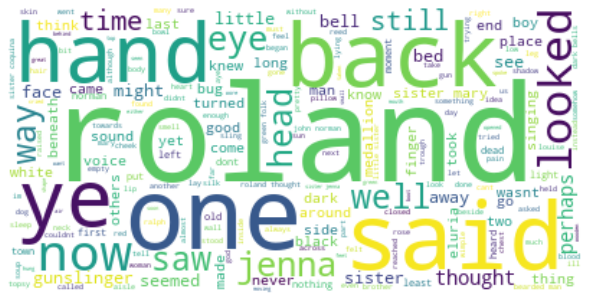

In [10]:
bookfile05 = open("little_sisters.txt","r+") 
book05 = bookfile05.readlines()
bookfile05.close()
book05_clean = []
for line in book05:
    book05_clean.append(re.sub('\n', '', line))
book05_cleaner = []
for line in book05_clean:
    book05_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book05 = " ".join([text.lower() for text in book05_cleaner])
print('First 100 characters: ', string_book05[:100])
print('Length of string: ',len(string_book05))
cloud05 = WordCloud(background_color="white").generate(string_book05)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud05, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

The most relevant word now is *roland*, what makes a lot of sense. *Said*, *back*, *one*, *hand* and *ye* are the next ones. We can see *gunslinger* is important.

## 4.3 *The Gunslinger*

First 100 characters:  the man in black fled across the desert and the gunslinger followed  the desert was the apotheosis o
Length of string:  332959


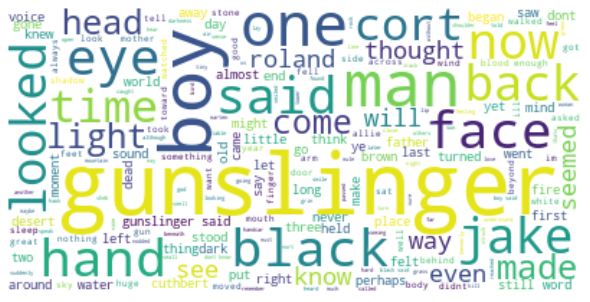

In [11]:
bookfile1 = open("gunslinger.txt","r+") 
book1 = bookfile1.readlines()
bookfile1.close()
book1_clean = []
for line in book1:
    book1_clean.append(re.sub('\n', '', line))
book1_cleaner = []
for line in book1_clean:
    book1_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book1 = " ".join([text.lower() for text in book1_cleaner])
print('First 100 characters: ', string_book1[:100])
print('Length of string: ',len(string_book1))
cloud1 = WordCloud(background_color="white").generate(string_book1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

*Gunslinger* is how Roland is called by most people he meets while following the *man* in *black*. In this book, Roland meets *Jake*, the *boy* who will accompany him until the end.

## 4.4 *The Drawing of the Three*

First 100 characters:  the gunslinger came awake from a confused dream which seemed to consist of a single image that of th
Length of string:  662029


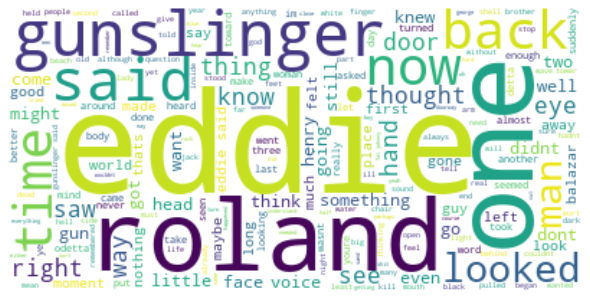

In [12]:
bookfile2 = open("drawing.txt","r+") 
book2 = bookfile2.readlines()
bookfile2.close()
book2_clean = []
for line in book2:
    book2_clean.append(re.sub('\n', '', line))
book2_cleaner = []
for line in book2_clean:
    book2_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book2 = " ".join([text.lower() for text in book2_cleaner])
print('First 100 characters: ', string_book2[:100])
print('Length of string: ',len(string_book2))
cloud2 = WordCloud(background_color="white").generate(string_book2)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

The new characters are starting to show. *Eddie*, *Roland* and *gunslinger* are the most relevant words.

## 4.5 *The Waste Lands*

First 100 characters:  it was her third time with live ammunition    and her first time on the draw from the holster roland
Length of string:  916387


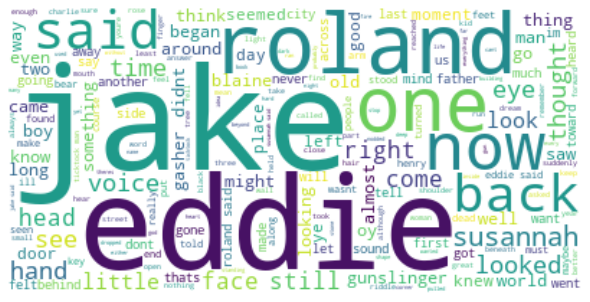

In [13]:
bookfile3 = open("waste_lands.txt","r+") 
book3 = bookfile3.readlines()
bookfile3.close()
book3_clean = []
for line in book3:
    book3_clean.append(re.sub('\n', '', line))
book3_cleaner = []
for line in book3_clean:
    book3_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book3 = " ".join([text.lower() for text in book3_cleaner])
print('First 100 characters: ', string_book3[:100])
print('Length of string: ',len(string_book3))
cloud3 = WordCloud(background_color="white").generate(string_book3)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Now we have our whole group: *Roland*, *Jake*, *Eddie* e *Susannah* (smaller). As they talk to each other during their journey, their names will be more frequent in the text.

## 4.6 *Wizard and Glass*

First 100 characters:  ask me a riddle blaine invited  fuck you roland said he did not raise his voice  what do you say in 
Length of string:  1343605


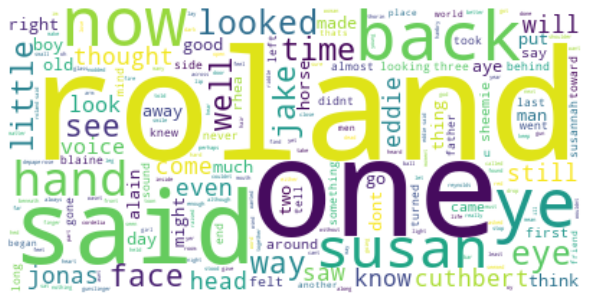

In [14]:
bookfile4 = open("wizard_glass.txt","r+") 
book4 = bookfile4.readlines()
bookfile4.close()
book4_clean = []
for line in book4:
    book4_clean.append(re.sub('\n', '', line))
book4_cleaner = []
for line in book4_clean:
    book4_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book4 = " ".join([text.lower() for text in book4_cleaner])
print('First 100 characters: ', string_book4[:100])
print('Length of string: ',len(string_book4))
cloud4 = WordCloud(background_color="white").generate(string_book4)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud4, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In this book, *Roland* is telling his back story, so we see less of his companions. We see *Susan*, *Jonas* and *Cuthbert*, his old friends.

## 4.7 *The Wind Through the Keyhole*

First 100 characters:  during the days after they left the green palace that wasnt oz after allbut which was now the tomb o
Length of string:  470207


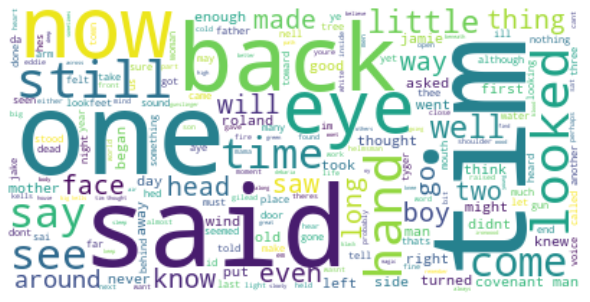

In [15]:
bookfile45 = open("wind_keyhole.txt","r+") 
book45 = bookfile45.readlines()
bookfile45.close()
book45_clean = []
for line in book45:
    book45_clean.append(re.sub('\n', '', line))
book45_cleaner = []
for line in book45_clean:
    book45_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book45 = " ".join([text.lower() for text in book45_cleaner])
print('First 100 characters: ', string_book45[:100])
print('Length of string: ',len(string_book45))
cloud45 = WordCloud(background_color="white").generate(string_book45)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud45, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Roland tells the tale of *Tim* Stoutheart to his friends. There are no remarkable words.

## 4.8 *Wolves of the Calla*

First 100 characters:  tian was blessed though few farmers would have used such a word with three patches river field where
Length of string:  1276123


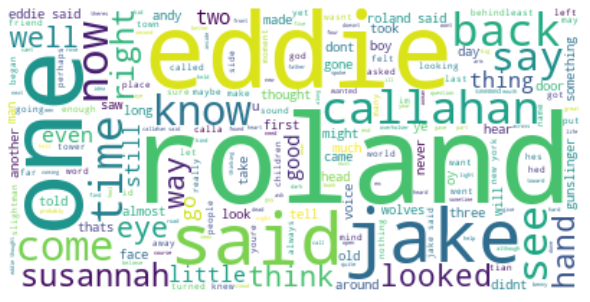

In [16]:
bookfile5 = open("wolves.txt","r+") 
book5 = bookfile5.readlines()
bookfile5.close()
book5_clean = []
for line in book5:
    book5_clean.append(re.sub('\n', '', line))
book5_cleaner = []
for line in book5_clean:
    book5_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book5 = " ".join([text.lower() for text in book5_cleaner])
print('First 100 characters: ', string_book5[:100])
print('Length of string: ',len(string_book5))
cloud5 = WordCloud(background_color="white").generate(string_book5)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud5, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Again we have our major characters, but now Father *Callahan* shows up.

## 4.9 *Song of Susannah*

First 100 characters:  how long will the magic stay  at first no one answered rolands question and so he asked it again thi
Length of string:  670161


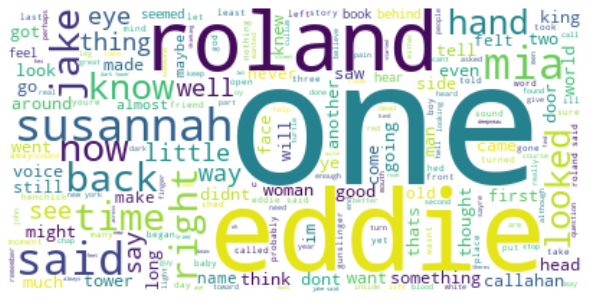

In [17]:
bookfile6 = open("song_susannah.txt","r+") 
book6 = bookfile6.readlines()
bookfile6.close()
book6_clean = []
for line in book6:
    book6_clean.append(re.sub('\n', '', line))
book6_cleaner = []
for line in book6_clean:
    book6_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book6 = " ".join([text.lower() for text in book6_cleaner])
print('First 100 characters: ', string_book6[:100])
print('Length of string: ',len(string_book6))
cloud6 = WordCloud(background_color="white").generate(string_book6)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud6, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

We see the name of the demon *Mia* who is responsible for the possession of Susannah.

## 4.10 *The Dark Tower*

First 100 characters:  pere don callahan had once been the catholic priest of a town salems lot had been its name that no l
Length of string:  1444800


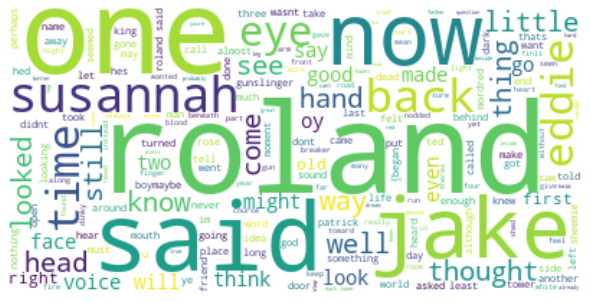

In [18]:
bookfile7 = open("dark_tower.txt","r+") 
book7 = bookfile7.readlines()
bookfile7.close()
book7_clean = []
for line in book7:
    book7_clean.append(re.sub('\n', '', line))
book7_cleaner = []
for line in book7_clean:
    book7_cleaner.append(re.sub(r'[^\w\s]', '', line))
string_book7 = " ".join([text.lower() for text in book7_cleaner])
print('First 100 characters: ', string_book7[:100])
print('Length of string: ',len(string_book7))
cloud7 = WordCloud(background_color="white").generate(string_book7)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud7, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

We come to the last book, and we see most of the words being repeated book after book. Let's take a look at the whole text and then we might revisit our graphs.

## 4.11 *The Dark Tower Series*

Let's join the texts from eight books and the short story.

In [19]:
string_series = string_book05+' '+string_book1+' '+string_book2+' '+string_book3+' '+string_book4+' '+string_book45+' '+string_book5+' '+string_book6+' '+string_book7
len(string_series)

7239327

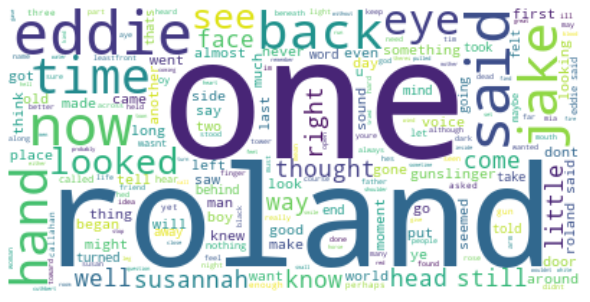

In [20]:
cloud_series = WordCloud(background_color="white").generate(string_series)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud_series, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 5. Filtering

We have some words that show up in most of the graphs, but don't bring any insight to the story. *One*, *back*, *said*, *now*, *time*, *hand*, *thought* and *looked* will be added to a list of words that aren't considered for the visualization. These are known as **stopwords**, such as *the* and *and*, who are used too frequently to be of any help to the graph.

Let's also remove the name of the four main characters: Roland, Jake, Eddie and Susannah. Most of the time they are talking amongst themselves, so their names are too frequent.

In [23]:
stop_words = ["one", "back", "said", "now", "time", "hand", "thought", "looked", "roland", "eddie", "jake", "susannah"]+list(STOPWORDS) 

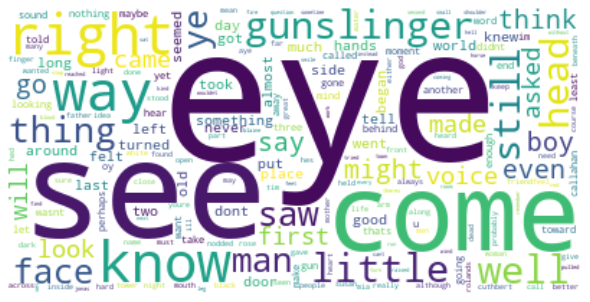

In [24]:
cloud_series_sw = WordCloud(stopwords = stop_words,background_color="white").generate(string_series)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud_series_sw, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

We could keep adding words to the list, but there is no end to that. Let's take a look at the first book again.

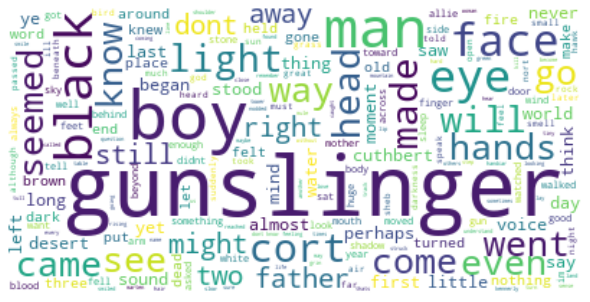

In [25]:
cloud1_sw = WordCloud(stopwords = stop_words,background_color="white").generate(string_book1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud1_sw, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

The first sentence of this book is: **The man in black fled across the desert, and the gunslinger followed.** This visualization is much better, drawing attention to the gunslinger, the man in black and the boy. <br>We can improve it a little further by adding a mask to the graph. 

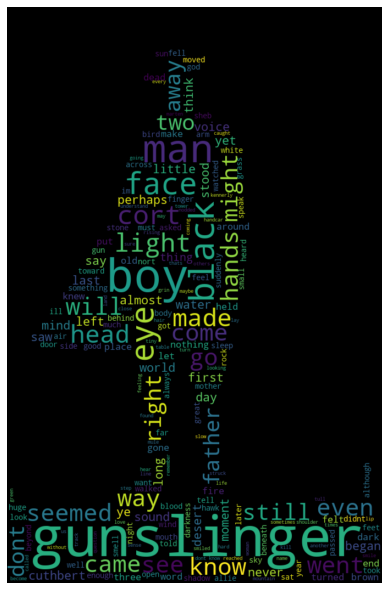

In [29]:
mask1 = np.array(Image.open("gunslinger.png"))
cloud1_sw_mask = WordCloud(mask=mask1, stopwords = stop_words).generate(string_book1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud1_sw_mask, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 6. Conclusion

This is a data visualization exercise. There are eight books and one short story following the journey of a group of four people towards the Dark Tower. It is a small set of main characters, so we should remove their names to be able to get some new insights. 

# **Final conclusion: we can present the distribution of relevant words for the Dark Tower Series in a pleasing and insightful visualization.**